In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
pd.options.display.max_columns = None

import os
#import re package for the use of regular expressions
import re
#import package for string handling
import string
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji

#import nltk package for text processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import numpy as np
try:
    from wordcloud import WordCloud, STOPWORDS
except:
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import pairwise_distances
import unicodedata





import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ragnarok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ragnarok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ragnarok/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# The following performs web scraping on classcentral.com

All the highest rated courses are obtained

In [3]:
# all_links_1 = listingSoup_1.find_all('a', attrs={'class': 'color-charcoal block line-tight course-name'})
# all_links_2 = listingSoup_2.find_all('a', attrs={'class': 'color-charcoal block line-tight course-name'})
# all_links_3 = listingSoup_3.find_all('a', attrs={'class': 'color-charcoal block line-tight course-name'})
# all_links_4 = listingSoup_4.find_all('a', attrs={'class': 'color-charcoal block line-tight course-name'})
# all_links = all_links_1 + all_links_2 + all_links_3 + all_links_4


# # Links are relative, of the form /course/course_number. Need to append this to main host name
# web_pages = ['https://www.classcentral.com' + link.get('href') for link in all_links]
# print(len(web_pages))
# web_pages

173


['https://www.classcentral.com/course/independent-dco042-python-for-informatics-1010',
 'https://www.classcentral.com/course/udacity-data-analysis-with-r-1478',
 'https://www.classcentral.com/course/edx-introduction-to-computational-thinking-and-data-science-1779',
 'https://www.classcentral.com/course/swayam-python-for-data-science-14266',
 'https://www.classcentral.com/course/edx-big-data-analysis-with-apache-spark-3026',
 'https://www.classcentral.com/course/edx-data-science-r-basics-9253',
 'https://www.classcentral.com/course/edx-foundations-of-data-science-computational-thinking-with-python-10319',
 'https://www.classcentral.com/course/comparinggenomes-3291',
 'https://www.classcentral.com/course/bigdataschool-2482',
 'https://www.classcentral.com/course/edx-quantitative-biology-workshop-1984',
 'https://www.classcentral.com/course/data-mining-with-weka-7805',
 'https://www.classcentral.com/course/independent-advanced-data-mining-with-weka-6146',
 'https://www.classcentral.com/co

In [4]:
# def getDescription(url):
#     response = requests.get(url)
#     jobSoup = BeautifulSoup(response.text, 'html.parser')
#     summary = jobSoup.find_all('div', attrs={'class': 'wysiwyg line-wide text-1 margin-bottom-large'})
#     return summary

# descriptions = [getDescription(page) for page in web_pages]

In [5]:
#all_stars = listingSoup.find_all('span', attrs = {'class': 'text-4 color-charcoal block'})[1:] #skip first, it's an ad
#all_stars = [float(star.text) for star in all_stars]
#print(len(all_stars))

# 54 ratings instead of 50 because of fucking ads. Need to work on removing them later.

In [6]:
# all_descriptions = ['']*len(descriptions)
# for idx, each_job in enumerate(descriptions):
#     for description in each_job:
#         all_descriptions[idx] += description.text
        
# for i in range(len(all_descriptions)):
#     all_descriptions[i] = all_descriptions[i].strip()
    
# print(all_descriptions[0])

This is a course to teach basic Python programming skills through data analysis. The book and course materials are all free and licensed as Creative Commons. There is no complex math in the course, the programs are generally quite short, and the workload is no more than a few hours per week. By the time you complete the course, you will understand be able to read, parse, and manipulate data using Python. Hopefully at the end of the course you will like programming well enough to take another course in programming or web development. You can register and launch, take the course, and earn your place on the map at any time and at your own pace


In [7]:
# len(all_descriptions)

173

In [9]:
# df_data = {'Link': web_pages, 'Description': all_descriptions}
# df = pd.DataFrame(df_data)

# df.to_csv('./programming_scraped.csv', index=False, header=True)
# df

,Link,Description
0,https://www.classcentral.com/course/independen...,This is a course to teach basic Python program...
1,https://www.classcentral.com/course/udacity-da...,Exploratory data analysis is an approach for s...
2,https://www.classcentral.com/course/edx-introd...,6.00.2x will teach you how to use computation ...
3,https://www.classcentral.com/course/swayam-pyt...,The course aims at equipping participants to b...
4,https://www.classcentral.com/course/edx-big-da...,Organizations use their data to support and in...
...,...,...
168,https://www.classcentral.com/course/mathematic...,Behind numerous standard models and constructi...
169,https://www.classcentral.com/course/advanced-d...,As a coursera certified specialization complet...
170,https://www.classcentral.com/course/gcp-data-m...,This online specialization provides participan...
171,https://www.classcentral.com/course/executive-...,"Assemble the right team, ask the right questio..."


# Load the scraped data that we saved previously

In [12]:
df = pd.read_csv('./programming_scraped.csv')
df.head(2)

,Link,Description
0,https://www.classcentral.com/course/independen...,This is a course to teach basic Python program...
1,https://www.classcentral.com/course/udacity-da...,Exploratory data analysis is an approach for s...


In [13]:
def ProcessText(tweet):
        
    
    #start by tokenize the tweet (separate it the text into words, or n-grams) with nltk
    word_tokens = word_tokenize(tweet) 
 
    #convert text into lowercase
    word_tokens = [word.lower() for word in word_tokens]
    
    #remove punctuation signs from tokens
    table = str.maketrans('', '', string.punctuation)
    word_tokens = [word.translate(table) for word in word_tokens]
    
    #remove non-alphabetic characters
    word_tokens = [word for word in word_tokens if word.isalpha()]
    
    #remove stopwords
    stop_words = set(stopwords.words('english')) #import a predefined set of stopwords from the nltk package
    word_tokens = [word for word in word_tokens if not word in stop_words]

    clean_tweet = [] #create empty list to store the final tokens after text processing
    for w in word_tokens:
        clean_tweet.append(w)

    #join the tokens of the clean tweet back into a string with spaces in between
    clean_tweet_str = ' '.join(clean_tweet)
    
    #return the clean tweet string
    return clean_tweet_str  


processedTextList = []
for desc in df['Description']:
    temp = ProcessText(desc)
    processedTextList.append(temp)
df['Processed Description'] = processedTextList

In [14]:
df['Processed Description'].head(3)

0    course teach basic python programming skills d...
1    exploratory data analysis approach summarizing...
2    teach use computation accomplish variety goals...
Name: Processed Description, dtype: object

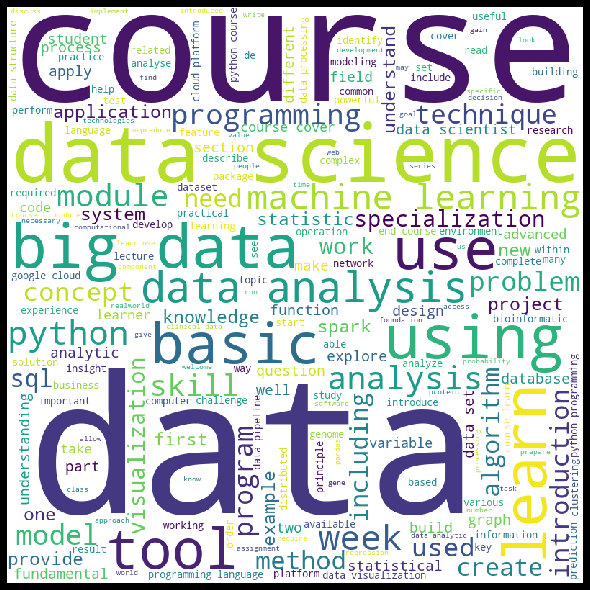

In [15]:
def generateWordCloud(strInput):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',  
                    min_font_size = 10).generate(strInput) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = 'black') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    
strForWC = ""
for desc in processedTextList:
    for text in desc:
        strForWC = strForWC + text

generateWordCloud(strForWC)

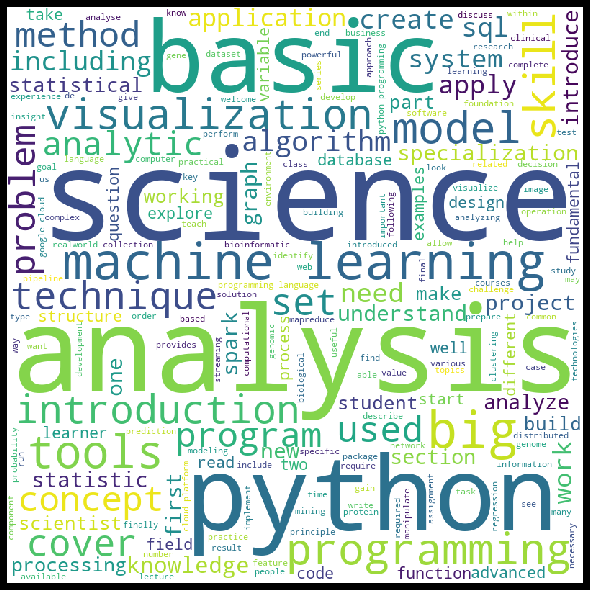

In [16]:
strForWC = ""
for desc in processedTextList:
    wordList = desc.split()
    for word in wordList:
        if (word not in ['week','module','learn','week','using','data','course','use','tool', 'provide', 'example', 
                        'topic', 'understanding']):
            strForWC = strForWC + word + ' '
generateWordCloud(strForWC)

# Constructing course curriculum from descriptions

In [17]:
# Based off ratings, this is the highest rated course with a good description Python

df['Processed Description'][3]

'course aims equipping participants able use python programming solving data science problems intended audience final year undergraduates prerequisites knowledge basic data science algorithms industry support honeywell abb ford gyan data pvt ltd course layout week python spyder tool introduction spyder setting working directory creating saving script file file execution clearing console removing variables environment clearing environment commenting script files variable creation arithmetic logical operators data types associated operations week structures lists tuples dictionary sets numpy array matrix associated operations linear algebra related operations week dataframe dataframe related operations toyota corolla dataset reading files exploratory data analysis data preparation preprocessing visualization toyoto corolla dataset using matplotlib seaborn libraries scatter plot line plot bar plot histogram box plot pair plot structures using toyota corolla dataset ifelse family loop loop

In [18]:
python_skills = ['algorithm', 'structures', 'list', 'tuple', 'dictionary', 'array', 'numpy', 'linear', 'algebra', 
                'dataframe', 'pandas', 'analysis', 'preprocessing', 'visualization', 'matplotlib', 'plot', 'seaborn',
                'libraries']


In [19]:
# Based off ratings, this is the highest rated course with a good description for R

df['Processed Description'][5]

'first professional certificate program data science course introduce basics r programming better retain r learn solve specific problem use realworld dataset crime united states learn r skills needed answer essential questions differences crime across different states cover r functions data types tackle operate vectors use advanced functions like sorting learn apply general programming features like ifelse loop commands wrangle analyze visualize data rather covering every r skill might need build strong foundation prepare indepth courses later series cover concepts like probability inference regression machine learning help develop skill set includes r programming data wrangling dplyr data visualization file organization unixlinux version control git github reproducible document preparation rstudio demand skilled data science practitioners rapidly growing series prepares tackle realworld data analysis challenges'

In [20]:
r_skills = ['exploratory', 'analysis', 'visualization', 'hypothesis', 'testing', 'rstudio', 'packages', 
            'distribution', 'anomalies', 'outliers', 'models', 'plots', 'variable', 'functions', 'wrangling', 
            'inference', 'dplyr']

These are some general progamming skills everyone requires

In [22]:
programming_skills = ['git', 'github', 'version', 'control']

In [23]:
skills = python_skills + r_skills + programming_skills

In [24]:
def detect_tool(table, concepts):
    # Initialize a word frequency table
    concept_table=pd.DataFrame(columns = concepts, index=range(len(table)), dtype=int)
    
    for concept in concepts:
        concept_table[concept] = np.zeros(len(concept_table))
        
    # Phrase detector
    for i in range(len(table)):
        text = table.iloc[i]
        
        # Extract the common concepts and calculate the word frequency
        for concept in concepts:
            if (re.findall(re.escape(concept), str(text)) != []):
                concept_table.loc[i, concept]=int(len(re.findall(re.escape(concept), text)))
    
    return concept_table

df_concepts = detect_tool(df['Processed Description'], skills)

df_concepts.head()

,algorithm,structures,list,tuple,dictionary,array,numpy,linear,algebra,dataframe,pandas,analysis,preprocessing,visualization,matplotlib,plot,seaborn,libraries,exploratory,analysis,visualization,hypothesis,testing,rstudio,packages,distribution,anomalies,outliers,models,plots,variable,functions,wrangling,inference,dplyr,git,github,version,control
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,3.0,0.0,3.0,0.0,0.0,6.0,8.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_concepts = df_concepts.loc[:, (df_concepts != 0).any(axis=0)]

# Clustering concepts into modules using unsupervised clustering dendrogram

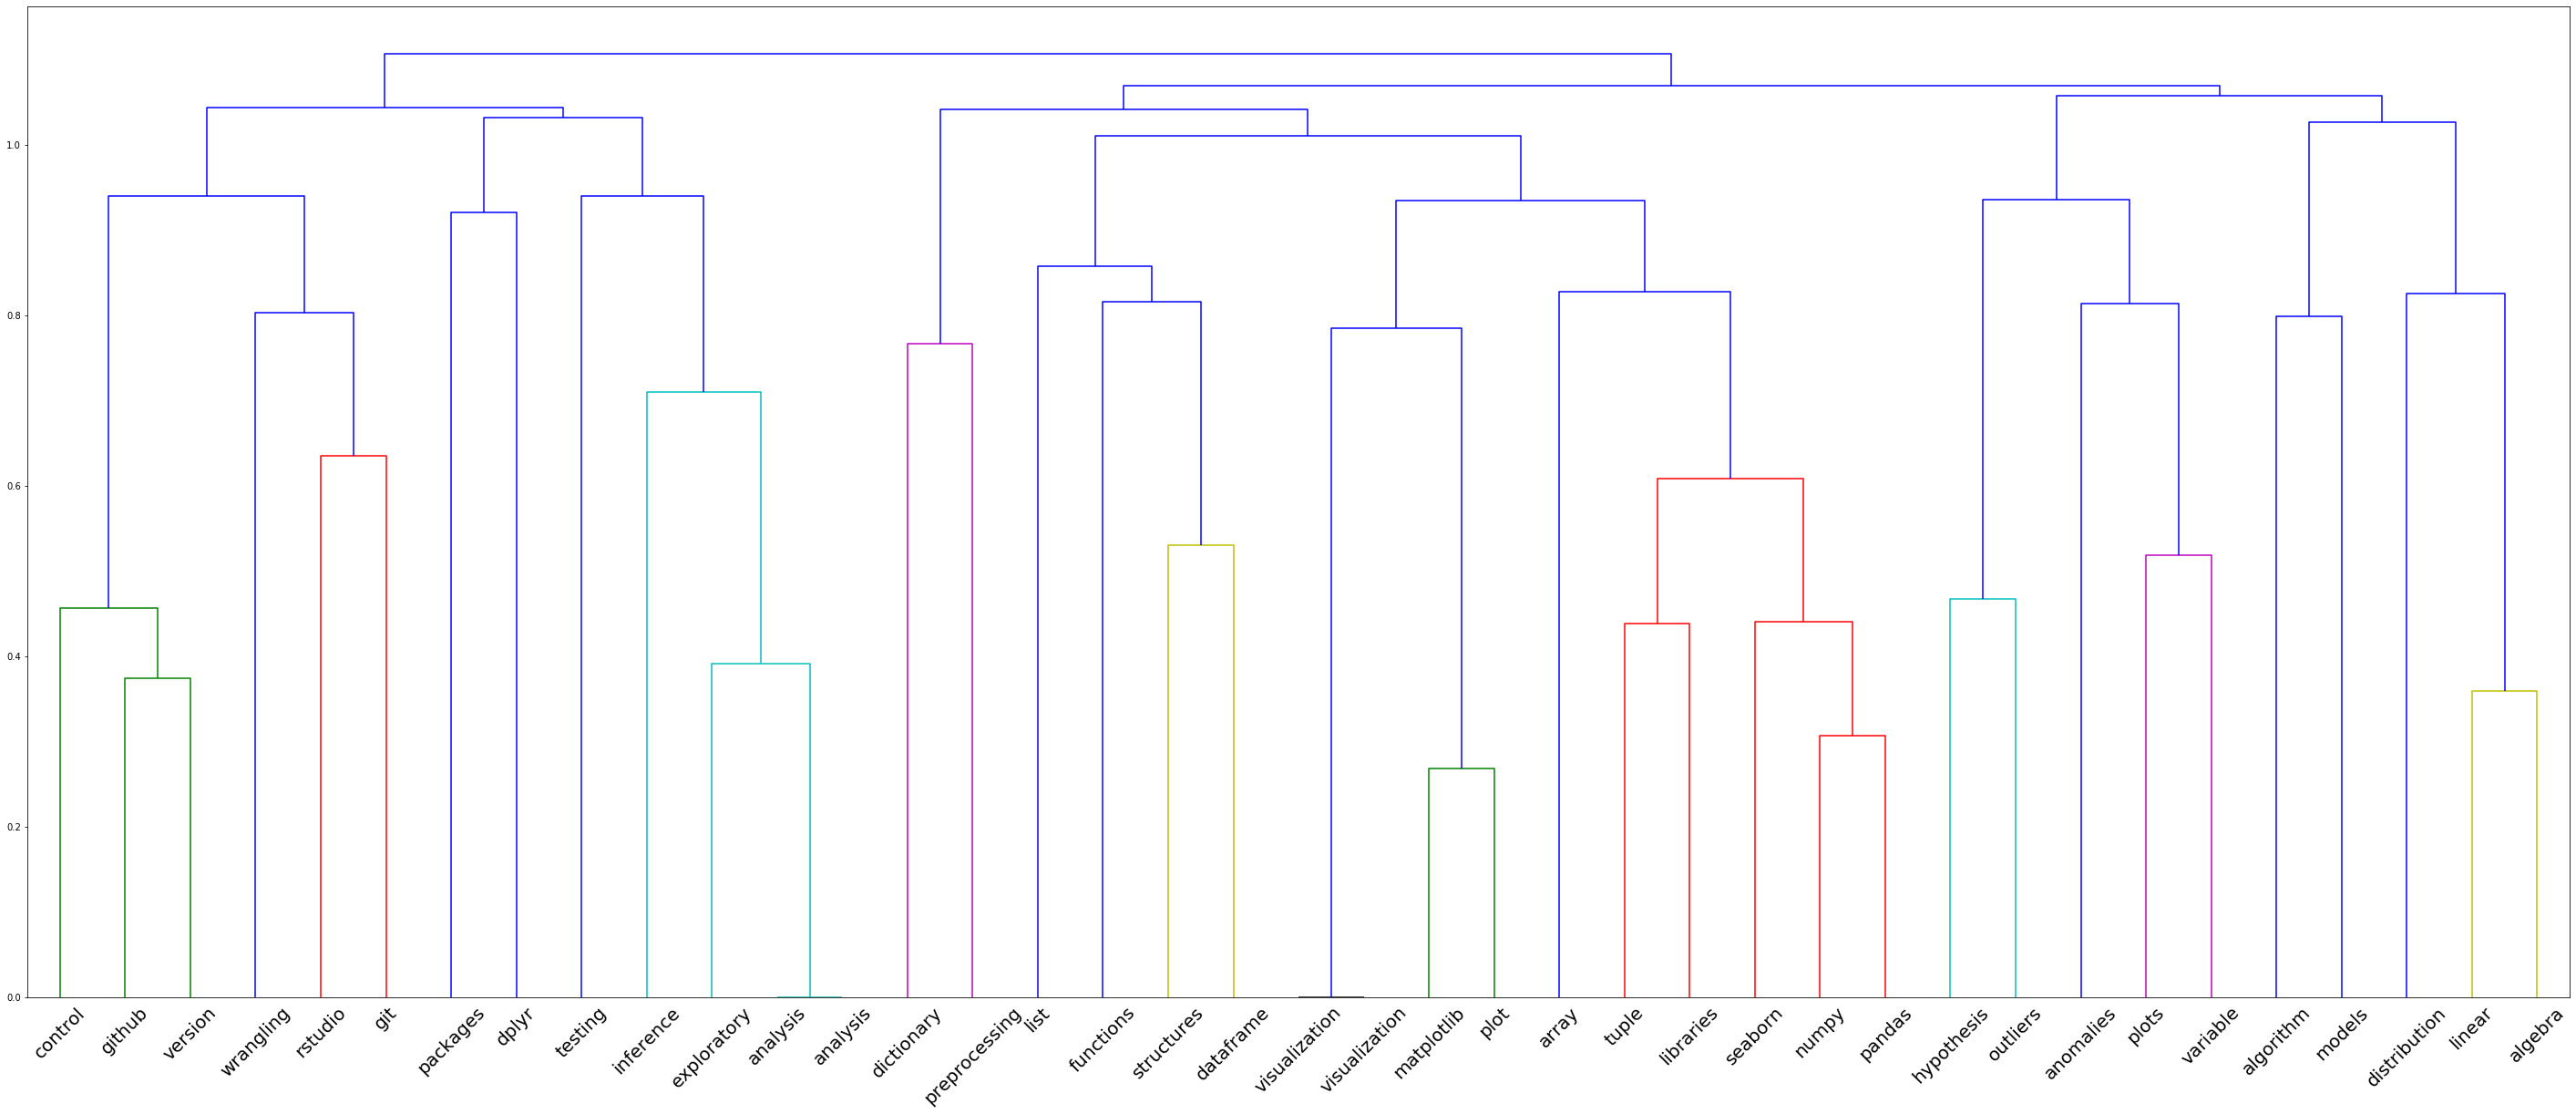

In [26]:
# Calculating the distance
dist = pdist(df_concepts.T, metric='euclidean')

# Calculating the linkage matrix
link = linkage(df_concepts.T, method='complete', metric='correlation')

# Draw the dendrogram
plt.figure(figsize=(50,20))
B=dendrogram(link, labels=df_concepts.columns, leaf_font_size=20)

### Programming

A fundamental course required not only as a basic skill, but also to bridge the gap between theoretical knowledge of statistics, data science, machine learning and practical implementation. Upon completion of the course, the student will be able to: 
* comfortably program in Python
* understand data structures and their uses
* use libraries such as numpy, pandas and seaborn with ease
* visualize given data
* understand and use version control effectively


#### COURSE OUTLINE

#### Module 1: An introduction to the snake

- Fundamentals: Variables, basic algebra
- Data structures: Lists, tuples, dictionaries
- Functions: Defining a function, input parameters, return statements, recursion
- Advanced operations: Aliasing, slicing, copying

#### Module 2: An introduction to snake libraries

- Numpy: arrays, reshaping, stacking, comparison with lists
- Pandas: series, dataframes, loading data, manipulating dataframes

#### Module 3: Version control (giving the snake a break)

- Necessity for version control
- Introduction to git
- Version control operations: stage, commit, push, revert, fetch, branch
- Github: Creating an account, uploading first repository

#### Module 4: Visualizing with the snake

- Basic plots: Matplotlib - plotting, essential charts
- Advanced plots: Seaborn -  additional plots, advanced operations
- Inference from visualization - identification of anomalies and outliers, trends, patterns, and relevant information

#### Module 5: You vs. snake

- Open-ended project. The user will choose a dataset from Kaggle, and derive useful insights from it. The goal is to get comfortable with all the libraries the user studied throughout the course. Creativity is, as always, encouraged.
- Essentials for the project: Pandas, matplotlib, seaborn.
- The user MUST use git, with periodic commits while working. The final github repository link should be shared with us.

# Data to back up above claim on best possible skills

- We use the Kaggle Salary dataset to obtain data on how many data scientists recommend the above skills, and how much salaries they earn with those skills

In [37]:
df = pd.read_csv('./Kaggle_Salary.csv')

In [38]:
df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, G...",0,-1,-1,-1,-1,-1,1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,Python,-1,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,N

In [39]:
list_of_columns = ['Q10']
for column in df.columns:
    if 'TEXT' not in column and '11' not in column and '12' not in column and ('Q18' in column or 'Q20' in column):
        list_of_columns.append(column)
print(list_of_columns)

df.drop(df.columns.difference(list_of_columns), 1, inplace=True)
df.fillna(value=0, inplace=True)

['Q10', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10', 'Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6', 'Q20_Part_7', 'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10']


In [40]:
df.head(2)

,Q10,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10
0,"30,000-39,999",Python,R,SQL,0,0,Java,Javascript,0,0,MATLAB,0,Matplotlib,0,0,0,0,0,0,0,0
1,"5,000-7,499",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
for column in df.columns:
    print(column, ': ', df[column].unique())

Q10 :  ['30,000-39,999' '5,000-7,499' '250,000-299,999' '4,000-4,999'
 '60,000-69,999' '10,000-14,999' '80,000-89,999' '$0-999' '2,000-2,999'
 '70,000-79,999' '90,000-99,999' '125,000-149,999' '40,000-49,999'
 '20,000-24,999' '15,000-19,999' '100,000-124,999' '7,500-9,999'
 '150,000-199,999' '25,000-29,999' '3,000-3,999' '1,000-1,999'
 '200,000-249,999' '50,000-59,999' '> $500,000' '300,000-500,000']
Q18_Part_1 :  ['Python' 0]
Q18_Part_2 :  ['R' 0]
Q18_Part_3 :  ['SQL' 0]
Q18_Part_4 :  [0 'C']
Q18_Part_5 :  [0 'C++']
Q18_Part_6 :  ['Java' 0]
Q18_Part_7 :  ['Javascript' 0]
Q18_Part_8 :  [0 'TypeScript']
Q18_Part_9 :  [0 'Bash']
Q18_Part_10 :  ['MATLAB' 0]
Q20_Part_1 :  [0 ' Ggplot / ggplot2 ']
Q20_Part_2 :  [' Matplotlib ' 0]
Q20_Part_3 :  [0 ' Altair ']
Q20_Part_4 :  [0 ' Shiny ']
Q20_Part_5 :  [0 ' D3.js ']
Q20_Part_6 :  [0 ' Plotly / Plotly Express ']
Q20_Part_7 :  [0 ' Bokeh ']
Q20_Part_8 :  [0 ' Seaborn ']
Q20_Part_9 :  [0 ' Geoplotlib ']
Q20_Part_10 :  [0 ' Leaflet / Folium ']


In [42]:
# Replace salary buckets with mid values

replace_dict = {}
for temp in df['Q10'].unique():
    salary = temp
    salary = salary.replace('$','').strip()
    salary = salary.replace('>','').strip()
    salary = salary.replace(',','').strip()
    if '-' not in salary:
        salary = float(salary)
    else:
        salary = (float(salary.split('-')[0]) + float(salary.split('-')[1])) / 2.0
    replace_dict[temp] = salary

df['Q10'].replace(replace_dict, inplace=True)
df.head()

,Q10,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10
0,34999.5,Python,R,SQL,0,0,Java,Javascript,0,0,MATLAB,0,Matplotlib,0,0,0,0,0,0,0,0
1,6249.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,274999.5,Python,R,SQL,0,0,0,0,0,Bash,0,Ggplot / ggplot2,Matplotlib,0,0,0,0,0,Seaborn,0,0
3,4499.5,Python,0,SQL,0,0,0,0,0,0,0,0,Matplotlib,0,0,0,Plotly / Plotly Express,0,Seaborn,0,0
4,64999.5,Python,R,0,0,0,0,0,0,0,0,Ggplot / ggplot2,0,0,0,0,0,0,0,0,0


In [43]:
#df = df[df['Q10'] >= 50000]

In [44]:
# Groups by unique values in each column to get the number of jobs that correspond to that skill

languages_list = []
visualization_list = []
languages_salaries = []
visualization_salaries = []
skill_count_dict = {}

for column in df.columns:
    if column == 'Q10':
        continue
    #print(column, ': ', df[column].unique())
    
    #Replace plotly/plotly express with plotly for brevity
    unique = 0
    for unique_val in df[column].unique():
        unique = unique_val if unique_val != 0 else unique
    #print(unique)
    
    skill_count_dict[unique] = df.groupby(column).count()['Q10'][unique]
    
    # This part is for later in the notebook
    if 'Plotly' in unique:
        unique = 'Plotly'
    
    if '18' in column:
        languages_list.append(unique)
        languages_salaries.append(df[df[column] != 0]['Q10'].mean(axis=0))
    else:
        visualization_list.append(unique)
        visualization_salaries.append(df[df[column] != 0]['Q10'].mean(axis=0))
    

In [45]:
skill_count_dict

{'Python': 9363,
 'R': 3652,
 'SQL': 5428,
 'C': 949,
 'C++': 1356,
 'Java': 1598,
 'Javascript': 1720,
 'TypeScript': 353,
 'Bash': 1763,
 'MATLAB': 962,
 ' Ggplot / ggplot2 ': 3274,
 ' Matplotlib ': 7507,
 ' Altair ': 141,
 ' Shiny ': 1110,
 ' D3.js ': 950,
 ' Plotly / Plotly Express ': 2566,
 ' Bokeh ': 870,
 ' Seaborn ': 4977,
 ' Geoplotlib ': 487,
 ' Leaflet / Folium ': 473}

In [47]:
total_jobs = df.shape[0]

## Percent of jobs that require each particular skill

In [48]:
for key in skill_count_dict:
    skill_count_dict[key] = round(skill_count_dict[key]/total_jobs * 100, 3)

skill_count_dict

{'Python': 74.922,
 'R': 29.223,
 'SQL': 43.434,
 'C': 7.594,
 'C++': 10.851,
 'Java': 12.787,
 'Javascript': 13.763,
 'TypeScript': 2.825,
 'Bash': 14.107,
 'MATLAB': 7.698,
 ' Ggplot / ggplot2 ': 26.198,
 ' Matplotlib ': 60.07,
 ' Altair ': 1.128,
 ' Shiny ': 8.882,
 ' D3.js ': 7.602,
 ' Plotly / Plotly Express ': 20.533,
 ' Bokeh ': 6.962,
 ' Seaborn ': 39.826,
 ' Geoplotlib ': 3.897,
 ' Leaflet / Folium ': 3.785}

### Python is at an astonishing 75%, while R and SQL are at 30% and 43% respectively.

### For visualization tools, Matplotlib is most recommended, with 60%, and Seaborn following with 40%

In [49]:
languages_percents = []
visualization_percents = []

for key in skill_count_dict:
    if key in languages_list:
        languages_percents.append(skill_count_dict[key])
    else:
        visualization_percents.append(skill_count_dict[key])
    

[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Languages'),
 Text(0.5, 1.0, 'Languages recommended by data scientists')]

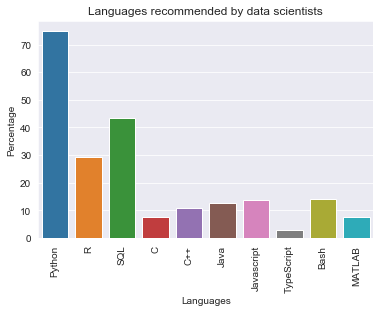

In [50]:
sns.set_style('darkgrid')
chart = sns.barplot(
    x=languages_list,
    y=languages_percents
)
chart.set_xticklabels(labels=languages_list, rotation=90)
chart.set(title='Languages recommended by data scientists', xlabel='Languages', ylabel='Percentage')

[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Visualization Tools'),
 Text(0.5, 1.0, 'Visualization tools recommended by data scientists')]

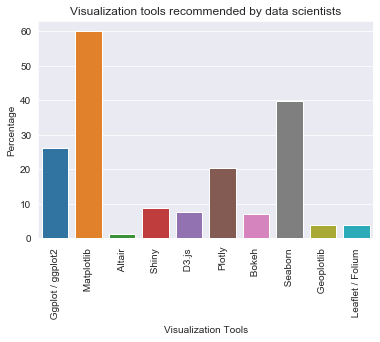

In [51]:
chart = sns.barplot(
    x=visualization_list,
    y=visualization_percents
)
chart.set_xticklabels(labels=visualization_list, rotation=90)
chart.set(title='Visualization tools recommended by data scientists', xlabel='Visualization Tools', ylabel='Percentage')

## Skills vs salaries

In [52]:
print(languages_salaries)
print(visualization_salaries)

[52917.58699134893, 59536.951533406354, 58314.216285924835, 51472.37723919916, 55059.614675516226, 50153.91833541927, 54370.87325581395, 63297.67138810198, 75339.55643788996, 50576.69282744283]
[57871.5276420281, 50526.61276142267, 79020.78723404255, 71408.7463963964, 72349.77684210526, 55643.79676539361, 68397.21321839081, 50741.668876833435, 49466.652977412734, 63126.88477801268]


[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Languages'),
 Text(0.5, 1.0, 'Languages and average salaries')]

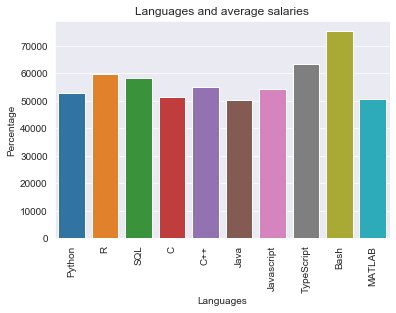

In [53]:
chart = sns.barplot(
    x=languages_list,
    y=languages_salaries
)
chart.set_xticklabels(labels=languages_list, rotation=90)
chart.set(title='Languages and average salaries', xlabel='Languages', ylabel='Percentage')

[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Visualization Tools'),
 Text(0.5, 1.0, 'Visualization tools and average salaries')]

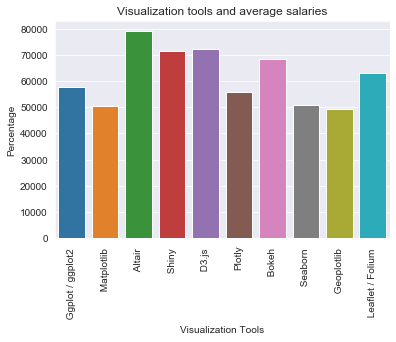

In [57]:
chart = sns.barplot(
    x=visualization_list,
    y=visualization_salaries
)
chart.set_xticklabels(labels=visualization_list, rotation=90)
chart.set(title='Visualization tools and average salaries', xlabel='Visualization Tools', ylabel='Percentage')

Note that while Matplotlib and seaborn seem to have lower salaries, this is simply because the other skills are extremely niche.

For a general data science job, knowing Altair visualization using Python is a very rare requirement, and is usually a skill that can be picked up during work.

Our focus is to gain the necessary skills to get a data science job.

## Pie chart visualization of recommended skills

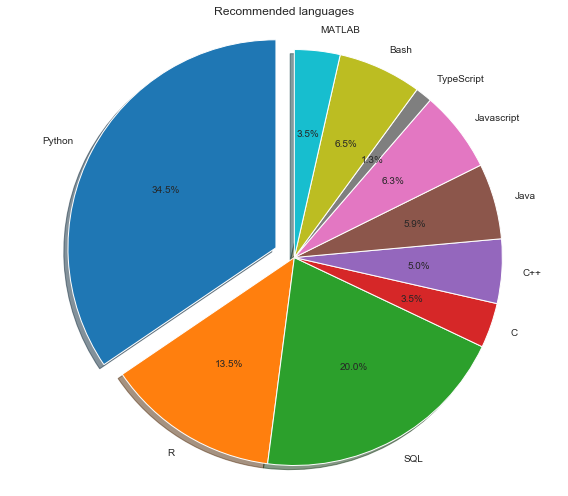

In [55]:
# Pie chart
labels = languages_list
sizes = languages_percents
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,) * len(labels)
explode = (0.1,) + explode[1:]
#add colors

fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Recommended languages')
plt.tight_layout()
plt.show()

[' Ggplot / ggplot2 ', ' Matplotlib ', ' Altair ', ' Shiny ', ' D3.js ', 'Plotly', ' Bokeh ', ' Seaborn ', ' Geoplotlib ', ' Leaflet / Folium ']


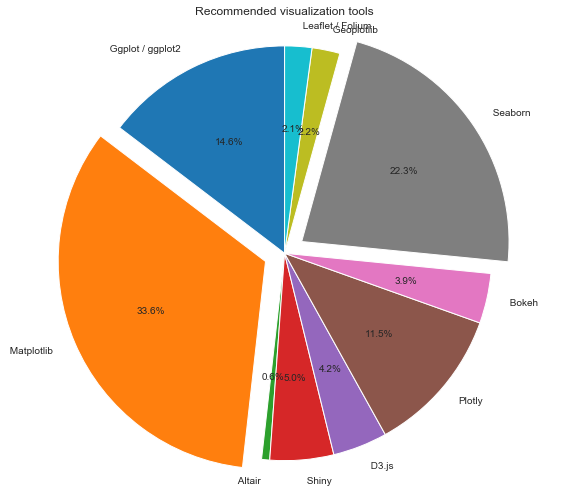

In [56]:
# Pie chart
labels = visualization_list
sizes = visualization_percents
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0.1,0, 0, 0, 0,0,0.1, 0,0)
print(labels)
#add colors

fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Recommended visualization tools')
plt.tight_layout()
plt.show()